In [1]:
library(alakazam)
library(igraph)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
db <- readIgphyml('./test_data//gw_bcr_out//ex_igphyml-pass.tab')

In [58]:
db$trees %>% length()
db$param %>% dim()
db$trees[1]

[1] 1021

[1] 1022   14

$`1036_111`
IGRAPH 35485a6 DNW- 6 5 -- 
+ attr: name (v/c), weight (e/n), label (e/n)
+ edges from 35485a6 (vertex names):
[1] 1036_111_GERM->6                          
[2] 6            ->7                          
[3] 7            ->CCTCAGTTCTCTAGGA-1_contig_2
[4] 7            ->TAGCCGGTCTACCAGA-1_contig_2
[5] 6            ->ACGTCAACAGATCTGT-1_contig_1


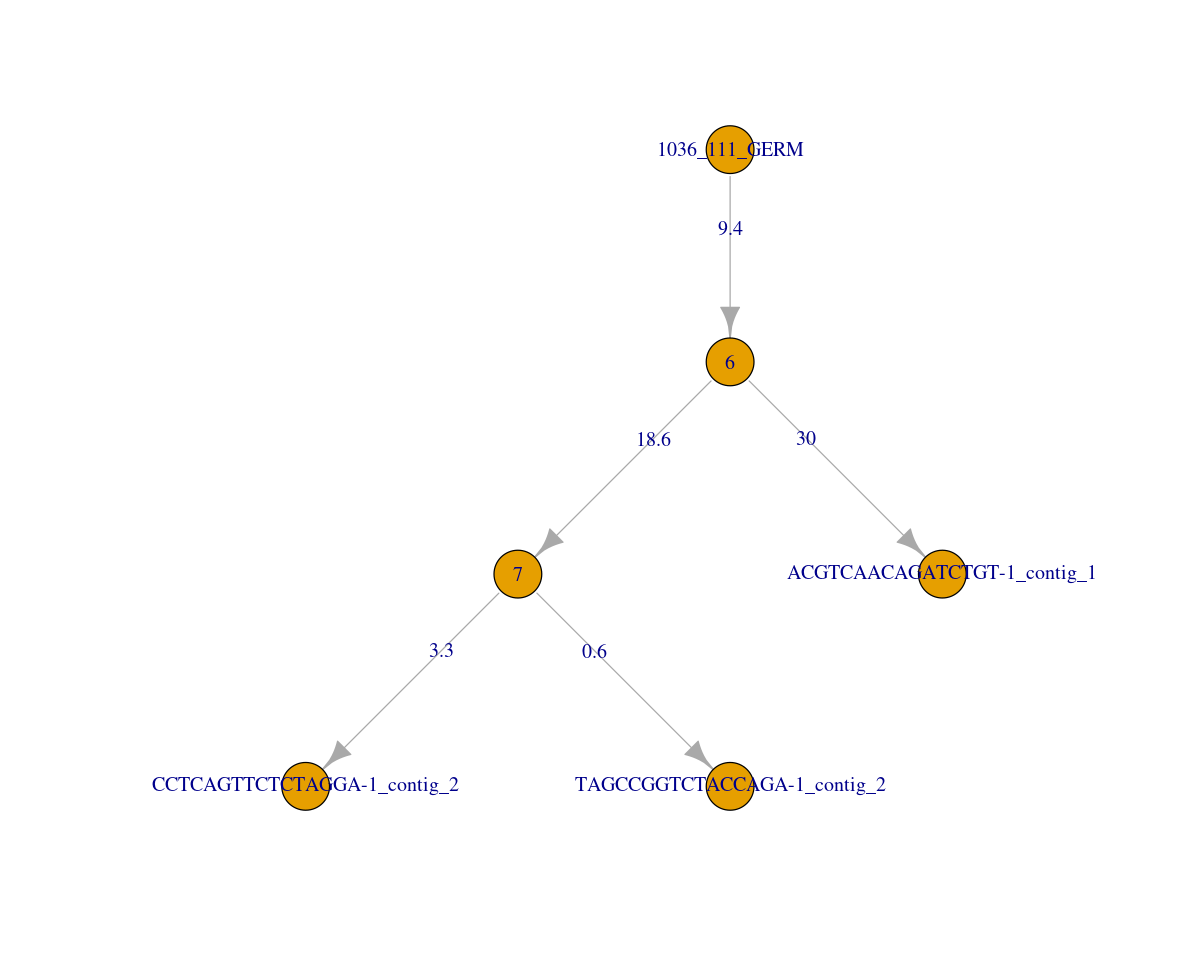

In [26]:
options(repr.plot.width=10, repr.plot.height=8)
plot(db$trees[[1]],layout=layout_as_tree)

In [6]:
library(ape)

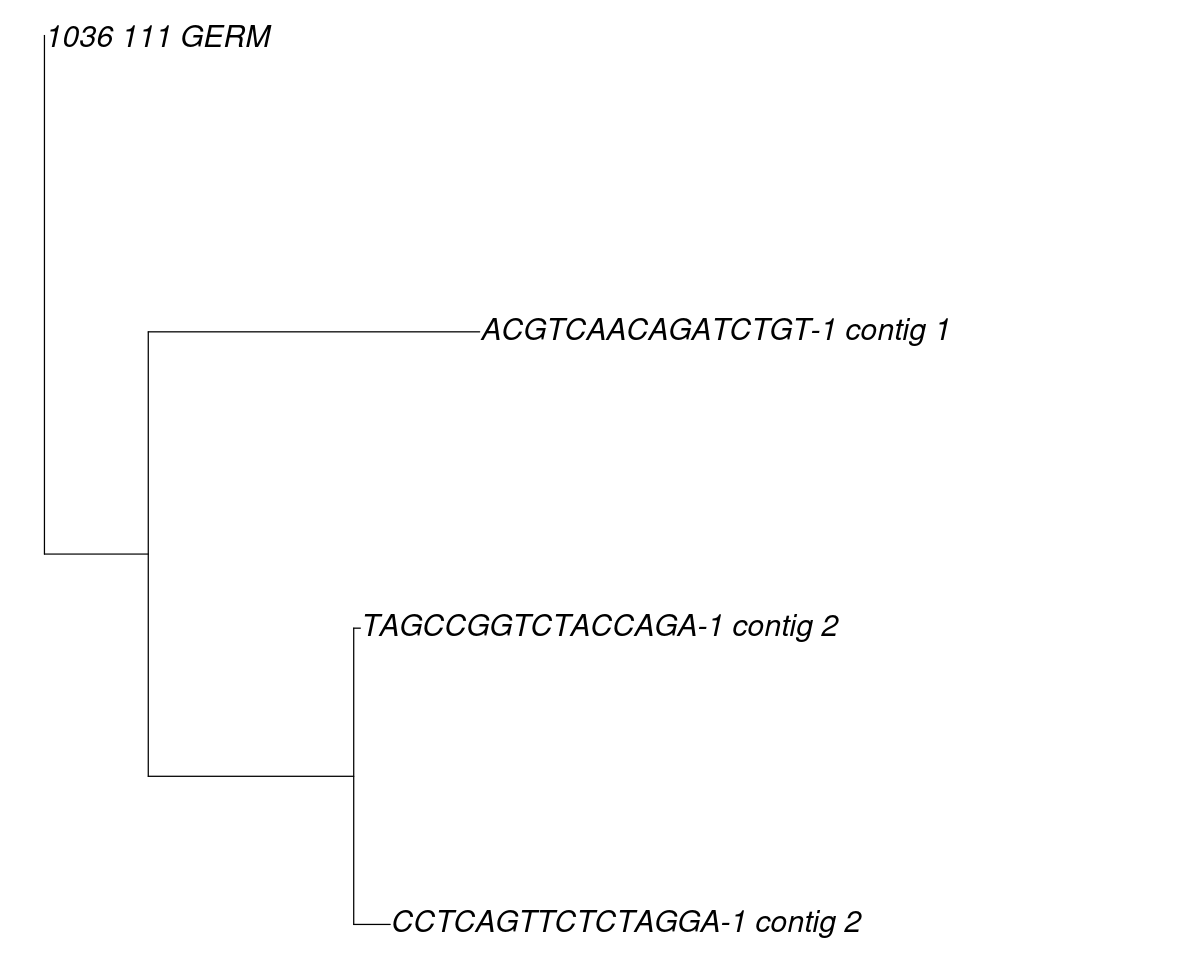

In [54]:
db2 = readIgphyml("./test_data//gw_bcr_out//ex_igphyml-pass.tab",format="phylo")

# Plot largest lineage tree
# 1-13 is not repeated
plot(ladderize(db2$trees[[1]]),cex=1.5,no.margin=TRUE)

## what is *contig* mean in the immcantation pipeline

In [30]:
output_10x <- read.csv('./test_data/gw_bcr_out/filtered_contig_annotations.csv')
dim(output_10x)
output_10x %>% head(5)

[1] 2281   18

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,AAACCTGCACCGCTAG-1,true,AAACCTGCACCGCTAG-1_contig_1,true,559,IGK,IGKV3-11,,IGKJ4,IGKC,true,true,CQQRSNRLTF,TGTCAGCAGCGTAGCAACCGACTCACTTTC,15258,147,clonotype767,clonotype767_consensus_2
2,AAACCTGCACCGCTAG-1,true,AAACCTGCACCGCTAG-1_contig_2,true,655,IGH,IGHV4-59,,IGHJ4,IGHG1,true,true,CARHLYYYGGSGSYYSFFDYW,TGTGCGAGACACCTGTATTACTATGGTGGTTCGGGGAGTTATTATAGCTTTTTTGACTACTGG,390,5,clonotype767,clonotype767_consensus_1
3,AAACCTGCACTAAGTC-1,true,AAACCTGCACTAAGTC-1_contig_1,true,521,IGH,IGHV4-59,IGHD6-19,IGHJ4,IGHM,true,true,CARGSYSSGWSLRYW,TGTGCGAGAGGCTCGTATAGCAGTGGCTGGTCCCTTAGGTACTGG,1498,13,clonotype227,clonotype227_consensus_1
4,AAACCTGCACTAAGTC-1,true,AAACCTGCACTAAGTC-1_contig_2,true,565,IGK,IGKV3-20,,IGKJ2,IGKC,true,true,CQQYGSSPLTF,TGTCAGCAGTATGGTAGCTCACCTCTCACTTTT,4088,40,clonotype227,clonotype227_consensus_3
5,AAACCTGCACTAAGTC-1,true,AAACCTGCACTAAGTC-1_contig_3,true,550,IGK,IGKV1-9,,IGKJ4,IGKC,true,true,CQQLNSYPLTF,TGTCAACAGCTTAATAGTTACCCGCTCACTTTC,674,6,clonotype227,clonotype227_consensus_2


In my understanding, **contig** is a mRNA unit (can be translate to one chain of TCR or BCR). So for one cell(B/T) it may have 2 contigs idealy(Ig heavy/light, TCR α/β), and 10x random name the config in barcode_contig_1 or barcode_contig_2. But we only consider heavy chain in immcatation clustering so barcode_contig_1/barcode_contig_2 takes the same meaning for us

## use  alakazam define clonetype

In [4]:
airr_GW <- read.csv('./test_data/gw_bcr_out/10x_clone-pass_germ-pass.tsv',sep = '\t')
airr_GW %>% head(3)

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa,germline_alignment_d_mask,germline_v_call,germline_d_call,germline_j_call
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCTCTGAAGGCAATTA-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG,FALSE,TRUE,"IGHV3-23*01,IGHV3-23D*01","IGHD1-14*01,IGHD2-21*02,IGHD3-3*01",IGHJ6*02,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGNNNNNNNNNNNCCGGANNACTACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,TGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGG,⋯,58,IGHV3-23,,IGHJ6,TGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGG,CAKGRVTPDDYCYYGMDVW,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGNNNNNNNNNNNNNNNNNNACTACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,IGHV3-23*01,IGHD1-14*01,IGHJ6*02
2,CGGACGTCAATCCGAT-1_contig_1,GGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATCACAGCTCCTCACCATGGACTGGACCTGGAGCATCCTTTTCTTGGTGGCAGCAGCAACAGGTGCCCACTCCCAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTACAATGGTAACACAAACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGATTCGGCCGAGCCCATAGCAGTGGCTGGGGAAAACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG,FALSE,TRUE,IGHV1-18*01,IGHD6-19*01,IGHJ6*02,CAGGTTCAGCTGGTGCAGTCTGGAGCT...GAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTT............ACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTAC......AATGGTAACACAAACTATGCACAGAAGCTCCAG...GGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGATTCGGCCGAGCCCATAGCAGTGGCTGGGGAAAACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,CAGGTTCAGCTGGTGCAGTCTGGAGCT...GAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTT............ACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTAC......AATGGTAACACAAACTATGCACAGAAGCTCCAG...GGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGANNNNNNNNNNNNNATAGCAGTGGCTGGNNNNNACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,TGTGCGAGAGATTCGGCCGAGCCCATAGCAGTGGCTGGGGAAAACTACTACTACGGTATGGACGTCTGG,⋯,59,IGH

In [9]:
sub_db <- subset(airr_GW, clone_id == '1036_111')
sub_db %>% head(3)
sub_db %>% colnames()

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa,germline_alignment_d_mask,germline_v_call,germline_d_call,germline_j_call
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,TAGCCGGTCTACCAGA-1_contig_2,AGCTCTGGGAGAGGAGCCCCAGCCTTGGGATTCCCAAGTGTTTTCATTCAGTGATCAGGACTGAACACAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGATTTTCCTTGCTGTTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTAAAGCCTGGGGAGTCCCTTAGACTGTCCTGTGCAGTCTCTGGATCCAGTTTTAATCTCGCCTGGATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATCAAAAGCAAAGGTAGTGGTGGGACATCAGACTACGCTGCACCCGTGAAAGACAGATTCACCATCTCAAGAGATGATTCAAAAAACACACTGTATCTACAAATGAACAGCCTGAAAACCGAGGACACAGCCGTGTATTACTGTACCTCACAGATTCGCCCTGTAAGGGGAACTACTTATTCTAACTACTACTACGGTTTAGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGCATCCCCGACCAGCCCCAAGGTCTTCCCGCTGAGCCTCTGCAGCACCCAGCCAGATGGGAACGTGGTCATCGCCTGCCTGGTCCAGGGCTTCTTCCCCCAGGAGCCACTCAGTGTGACCTGGAGCGAAAGCGGACAGGGCGTGACCGCCAGAAACTTCCC,FALSE,TRUE,IGHV3-15*01,IGHD1-7*01,IGHJ6*02,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTAAAGCCTGGGGAGTCCCTTAGACTGTCCTGTGCAGTCTCTGGATCCAGTTTT............AATCTCGCCTGGATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATCAAAAGCAAAGGTAGTGGTGGGACATCAGACTACGCTGCACCCGTGAAA...GACAGATTCACCATCTCAAGAGATGATTCAAAAAACACACTGTATCTACAAATGAACAGCCTGAAAACCGAGGACACAGCCGTGTATTACTGTACCTCACAGATTCGCCCTGTAAGGGGAACTACTTATTCTAACTACTACTACGGTTTAGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTAAAGCCTGGGGGGTCCCTTAGACTCTCCTGTGCAGCCTCTGGATTCACTTTC............AGTAACGCCTGGATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATTAAAAGCAAAACTGATGGTGGGACAACAGACTACGCTGCACCCGTGAAA...GGCAGATTCACCATCTCAAGAGATGATTCAAAAAACACGCTGTATCTGCAAATGAACAGCCTGAAAACCGAGGACACAGCCGTGTATTACTGTACCACANNNNNNNNNNNNNNNNNNGGAACTACNNNNNNNNACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,TGTACCTCACAGATTCGCCCTGTAAGGGGAACTACTTATTCTAACTACTACTACGGTTTAGACGTCTGG,⋯,2238,IGHV3-15,,IGHJ6,TGTACCTCACAGATTCGCCCTGTAAGGGGAACTACTTATTCTAACTACTACTACGGTTTAGACGTCTGG,CTSQIRPVRGTTYSNYYYGLDVW,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTAAAGCCTGGGGGGTCCCTTAGACTCTCCTGTGCAGCCTCTGGATTCACTTTC............AGTAACGCCTGGATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATTAAAAGCAAAACTGATGGTGGGACAACAGACTACGCTGCACCCGTGAAA...GGCAGATTCACCATCTCAAGAGATGATTCAAAAAACACGCTGTATCTGCAAATGAACAGCCTGAAAACCGAGGACACAGCCGTGTATTACTGTACCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,IGHV3-15*01,IGHD1-26*01,IGHJ6*02
40,CCTCAGTTCTCTAGGA-1_contig_2,AGCTCTGGGAGAGGAGCCCCAGCCTTGGGATTCCCAAGTGTTTTCATTCAGTGATCAGGACTGAACACAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGATTTTCCTTGCTGTTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGATGGTGGAGTCTGGGGGAGGCTTGGTAAAGCCTGGGGAGTCCCTTAGACTGTCCTGTGTAGTCTCTGGATCCAGTTTTAATCTCGCCTGGATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATCAAAAGCAAAGGTAGTGGTGGGACATCAGACTACGCTGCACCCGTGAAAGACAGATTCACCATCTCAAGAGATGATTCAAAAGACACACTGTATCTACAAATGAACAGCCTGAAAACCGAGGACACAGCCGTGTATTACTGTACCTCACAGATTCGCCCTGTAAGGGGAACTACTTATTCTAACTACTACTACGGTCTAGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGCATCCCCGACCAGCCCCAAGGTCTTCCCGCTGAGCCTCGACAGCACCCCCCAAGATGGGAACGTGGTCGTCGCATGCCTGGTCCAGGGCTTCTTCCCCCAGGAGCCACTCAGTGTGACCTGGAGCGAAAGCGGACAGAACGTGACCGCCAGAAACTTCCC,FALSE,TRUE,IGHV3-15*01,IGHD1-7*01,IGHJ6*02,GAGGTGCAGATGGTGGAGTCTGGGGGA...GGCTTGGTAAAGCCTGGGGAGTCCCTTAGACTGTCCTGTGTAGTCTCTGGATCCAGTTTT............AATCTCGCCTGGATGAACTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATCAAAAGCAAAGGTAGTGGTGGGACATCAGACTACGCTGCACCCGTGAAA...GACAGATTCACCATCTCAAGAGATGATTCAAAAGACACACTGTATCTACAAATGAACAGCCTGAAAACCGAGGACACAGCCGTGTATTACTGTACCTCACAGATTCGCCCTGTAAGGGGAACTACTTATTCTAACTACTACTACGGTCTAGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTAAAGCCTGGGGGGTCCCTTAGACTCTCCTGTGCAGCCTCTGGATTCACTTTC............AGTAACGCCTGGATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATTAAAAGCAAAACTGATGGTGGGACAACAGACTACGCTGCACCCGTGAAA...GGCAGATTCACCATCTCA

[1] "sequence_id"               "sequence"                 
 [3] "rev_comp"                  "productive"               
 [5] "v_call"                    "d_call"                   
 [7] "j_call"                    "sequence_alignment"       
 [9] "germline_alignment"        "junction"                 
[11] "junction_aa"               "v_cigar"                  
[13] "d_cigar"                   "j_cigar"                  
[15] "stop_codon"                "vj_in_frame"              
[17] "locus"                     "junction_length"          
[19] "np1_length"                "np2_length"               
[21] "v_sequence_start"          "v_sequence_end"           
[23] "v_germline_start"          "v_germline_end"           
[25] "d_sequence_start"          "d_sequence_end"           
[27] "d_germline_start"          "d_germline_end"           
[29] "j_sequence_start"          "j_sequence_end"           
[31] "j_germline_start"          "j_germline_end"           
[33] "v_score"                   "v_identity"               
[35] "v_support"                 "d_score"                  
[37] "d_identity"                "d_support"                
[39] "j_score"                   "j_identity"               
[41] "j_support"                 "fwr1"                     
[43] "fwr2"                      "fwr3"                     
[45] "fwr4"                      "cdr1"                     
[47] "cdr2"                      "cdr3"                     
[49] "cell_id"                   "c_call"                   
[51] "consensus_count"           "clone_id"                 
[53] "umi_count"                 "v_call_10x"               
[55] "d_call_10x"                "j_call_10x"               
[57] "junction_10x"              "junction_10x_aa"          
[59] "germline_alignment_d_mask" "germline_v_call"          
[61] "germline_d_call"           "germline_j_call"

In [11]:
# This example data set does not have ragged ends
# Preprocess clone without ragged end masking (default)
clone <- makeChangeoClone(sub_db, text_fields=c("sequence_id", "c_call"), 
                          num_fields="umi_count")

# Show combined annotations
clone@data[, c("sequence_id", "c_call", "umi_count")]

,sequence_id,c_call,umi_count
,<chr>,<chr>,<int>
39,TAGCCGGTCTACCAGA-1_contig_2,IGHA1,2238
40,CCTCAGTTCTCTAGGA-1_contig_2,IGHA2,550
41,ACGTCAACAGATCTGT-1_contig_1,IGHA2,2286


In [12]:
# run phylip
graph <- buildPhylipLineage(clone, phylip_exec = '~/software/phylip-3.697/exe/dnapars', rm_temp=TRUE)

In [13]:
data.frame(clone_id=graph$clone,
           junction_length=graph$junc_len,
           v_gene=graph$v_gene,
           j_gene=graph$j_gene)

clone_id,junction_length,v_gene,j_gene
<chr>,<int>,<chr>,<chr>
1036_111,69,IGHV3-15,IGHJ6


In [15]:
data.frame(sequence_id=V(graph)$name, 
           c_call=V(graph)$c_call,
           duplicate_count=V(graph)$umi_count)

sequence_id,c_call,duplicate_count
<chr>,<chr>,<int>
Inferred1,NA,NA
Inferred2,NA,NA
Germline,NA,NA
ACGTCAACAGATCTGT-1_contig_1,IGHA2,2286
CCTCAGTTCTCTAGGA-1_contig_2,IGHA2,550
TAGCCGGTCTACCAGA-1_contig_2,IGHA1,2238


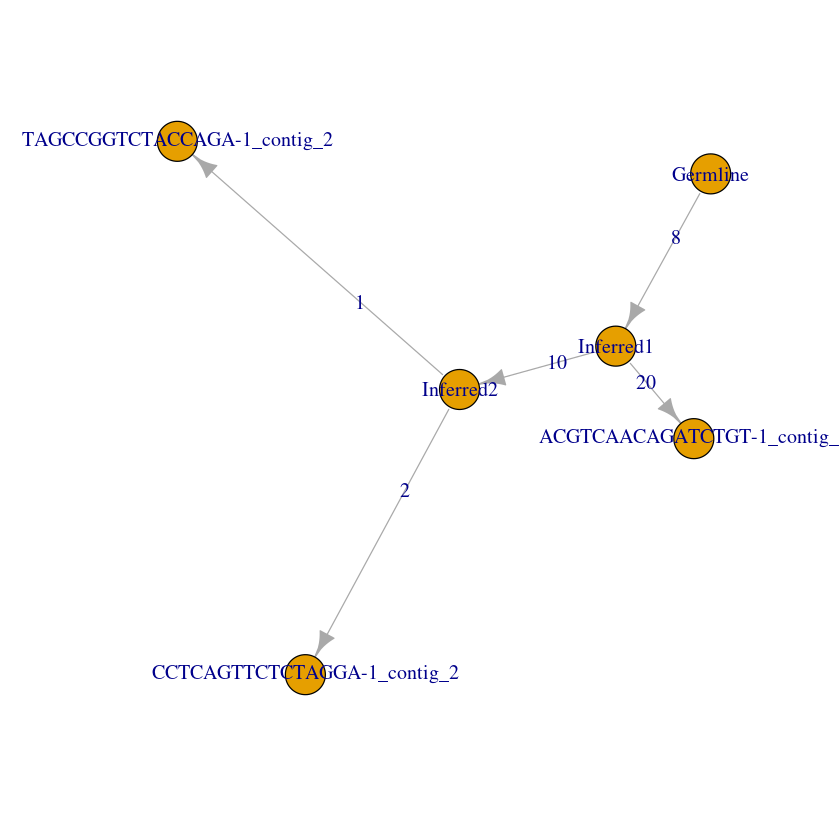

In [16]:
plot(graph)

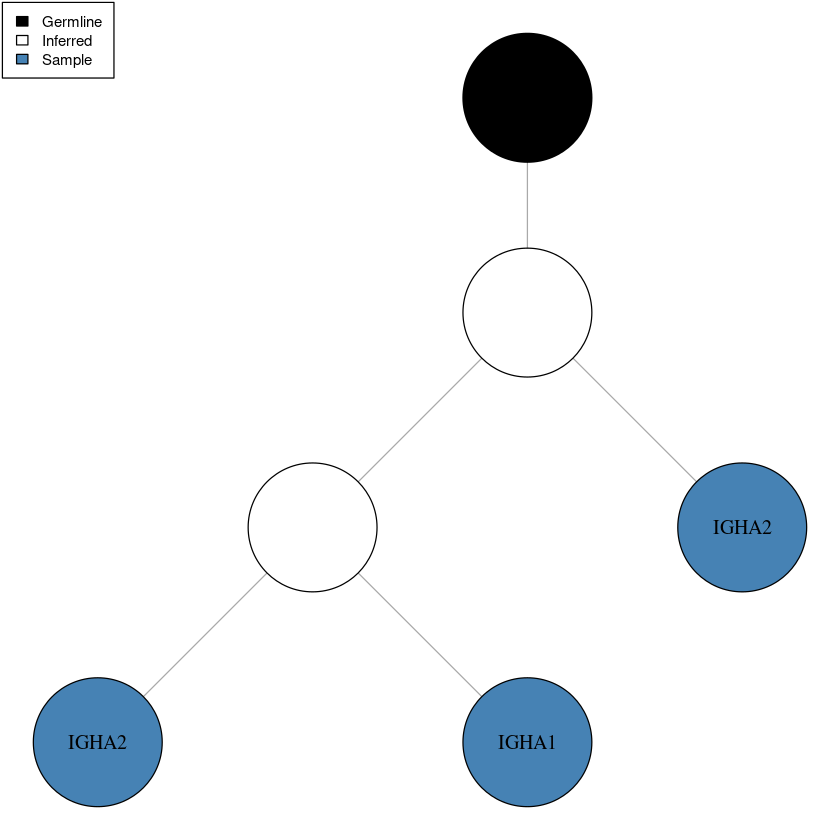

In [17]:
# Modify graph and plot attributes
V(graph)$color <- "steelblue"
V(graph)$color[V(graph)$name == "Germline"] <- "black"
V(graph)$color[grepl("Inferred", V(graph)$name)] <- "white"
V(graph)$label <- V(graph)$c_call
E(graph)$label <- ""

# Remove large default margins
par(mar=c(0, 0, 0, 0) + 0.1)
# Plot graph
plot(graph, layout=layout_as_tree, edge.arrow.mode=0, vertex.frame.color="black",
     vertex.label.color="black", vertex.size=40)
# Add legend
legend("topleft", c("Germline", "Inferred", "Sample"), 
       fill=c("black", "white", "steelblue"), cex=0.75)